<a href="https://colab.research.google.com/github/anagdesa/Basic-of-Python-for-Data-Science/blob/main/Klasifikasi_dan_Visual_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tugas Harian Pertemuan 11**

Pelatihan Data Scientist: Artificial Intelligence untuk Dosen dan Instruktur

  *   Nama Peserta: **Gramandha Wega Intyanto** 
  *   Nomer: 



**Penugasan:**

1. Gunakan dataset Iris (https://archive.ics.uci.edu/ml/datasets/iris)
2. Data dibagi dengan proporsi :
  *   Data Latih (70%)
  *   Data Uji (30%)
3. Gunakan metode klasifikasi dengan parameter tuning untuk mendapatkan akurasi terbaik
4. Terapkan Adaboost algorithm dan lakukan analisa perbandingan terhadap performa yang dihasilkan
dari metode klasifikasi sebelumnya

**Jawaban:**

**Library**

In [125]:
# Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Membuat class untuk merubah classification_report menjadi dictonary**



In [10]:
def dict_classification_report(y_test, y_pred):
    from sklearn import metrics
    import pandas as pd

    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    df_classification_report = df_classification_report.sort_values(by=['f1-score'], ascending=False)
    return df_classification_report

# 0. Dataset

Dataset yang digunakan dalam Notebook ini adalah dataset Iris (https://archive.ics.uci.edu/ml/datasets/iris) yang disediakan dalam pustaka Sklearn. Dataset dapat di-import dengan potongan kode di bawah:

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data  # we only take the first two features.
y = iris.target

Dataset Iris terdiri dari 3 kelas (Iris Setosa, Iris Versicolour, Iris Virginica) dengan banyak data sejumlah 150. Atribut / Fitur dari dataset terdiri dari sepal length dalam cm, sepal width dalam cm, petal length dalam cm, dan petal width dalam cm.

In [4]:
print("Banyak data: ", len(X))

Banyak data:  150


In [5]:
print("10 data pertama: ")
print(X[:10])

10 data pertama: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [6]:
print("10 label pertama: ")
print(y[:10])

10 label pertama: 
[0 0 0 0 0 0 0 0 0 0]


# 1. Pembagian Data

## 1.1 Train-Validation Split


Train-Validation split dapat dilakukan dengan menjalankan potongan kode di bawah. Persentase pembagian data training dan data validasi dapat ditentukan dengan mengubah nilai parameter train_size.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

In [8]:
print("Banyak data latih setelah dilakukan Train-Validation Split: ", len(X_train))
print("Banyak data uji setelah dilakukan Train-Validation Split: ", len(X_test))

Banyak data latih setelah dilakukan Train-Validation Split:  105
Banyak data uji setelah dilakukan Train-Validation Split:  45


## 1.2	K-Fold Cross Validation

Pustaka Scikit-learn menyediakan wrapper untuk melakukan K-Fold Cross Validation, yaitu dengan meng-import cross_val_score. cross_val_score menerima input berupa model machine learning, data training, label training, dan nilai K. Output yang dikeluarkan akan berupa list berisi akurasi setiap fold, sehingga untuk mendapatkan nilai rata-rata akurasi dari setiap foldnya, dapat menggunakan built-in function mean().

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC


model = SVC(kernel = 'linear', C = 1)
scores = cross_val_score(model, X, y, cv = 5)
print("Akurasi model SVM untuk tiap fold: ", scores)
print("Akurasi model SVM dengan 5-Fold Cross Validation: ", scores.mean())

Akurasi model SVM untuk tiap fold:  [0.96666667 1.         0.96666667 0.96666667 1.        ]
Akurasi model SVM dengan 5-Fold Cross Validation:  0.9800000000000001


# 2. Metode Klasifikasi

Untuk potongan-potongan kode Metode Klasifikasi, data yang akan digunakan adalah data yang telah terbagi oleh proses Train-Validation split. Model akan dilatih dengan X_train dan y_train. Model yang telah terlatih kemudian diuji performa akurasinya menggunakan X_test dan y_test.

## 2.1 Logistic Regression

Penjelasan lebih lengkap mengenai penggunaan Logistic Regression dapat dilihat pada https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score,f1_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd

lr = LogisticRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc_lr = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Logistic Regression: ", acc_lr)

# prep_lr = precision_score(y_test, y_pred, average='micro')
# print("Precision dengan menggunakan Logistic Regression: ", prep_lr)

# recall_lr = recall_score(y_test, y_pred, average='micro')
# print("Recall dengan menggunakan Logistic Regression: ", recall_lr)

# f1_lr = f1_score(y_test, y_pred, average='micro')
# print("F1 dengan menggunakan Logistic Regression: ", f1_lr)

rp_lr = dict_classification_report(y_test,y_pred)
print(rp_lr)

cm_lr = confusion_matrix(y_test, y_pred)
print(cm_lr)

perf_lr =rp_lr.loc[ 'weighted avg' ,  'precision' : 'f1-score' ]
key_perf_lr = perf_lr.keys()

perf_acc_lr = rp_lr.loc['accuracy','f1-score']

V_Plr_key = np.append('accuracy', key_perf_lr)
V_Plr = np.append(perf_acc_lr, perf_lr)

n_lr = pd.DataFrame(V_Plr, V_Plr_key, columns=['l-regression'])
n_lr.head()

Akurasi dengan menggunakan Logistic Regression:  0.9777777777777777
              precision    recall  f1-score    support
0              1.000000  1.000000  1.000000  13.000000
macro avg      0.981481  0.977778  0.978982  45.000000
accuracy       0.977778  0.977778  0.977778   0.977778
weighted avg   0.979012  0.977778  0.977712  45.000000
1              0.944444  1.000000  0.971429  17.000000
2              1.000000  0.933333  0.965517  15.000000
[[13  0  0]
 [ 0 17  0]
 [ 0  1 14]]


,l-regression
accuracy,0.977778
precision,0.979012
recall,0.977778
f1-score,0.977712


## 2.2 Support Vector Machine

Penjelasan lebih lengkap mengenai penggunaan Support Vector Machine dapat dilihat pada https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [120]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score,f1_score, classification_report, confusion_matrix


svm = SVC(
  kernel = 'rbf',
  C = 1,
  gamma = 0.01
)

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
acc_svm = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Logistic Regression: ", acc_svm)


rp_svm = dict_classification_report(y_test,y_pred)
print(rp_svm)

cm_svm = confusion_matrix(y_test, y_pred)
print(cm_svm)

perf_svm =rp_svm.loc[ 'weighted avg' ,  'precision' : 'f1-score' ]
key_perf_svm = perf_svm.keys()

perf_acc_svm = rp_svm.loc['accuracy','f1-score']

V_Psvm_key = np.append('accuracy', key_perf_svm)
V_Psvm = np.append(perf_acc_svm, perf_svm)

n_svm = pd.DataFrame(V_Psvm, V_Psvm_key, columns=['SVM-rbf'])
n_svm.head()

Akurasi dengan menggunakan Logistic Regression:  0.9555555555555556
              precision    recall  f1-score    support
0              1.000000  1.000000  1.000000  13.000000
macro avg      0.958170  0.958170  0.958170  45.000000
accuracy       0.955556  0.955556  0.955556   0.955556
weighted avg   0.955556  0.955556  0.955556  45.000000
1              0.941176  0.941176  0.941176  17.000000
2              0.933333  0.933333  0.933333  15.000000
[[13  0  0]
 [ 0 16  1]
 [ 0  1 14]]


,SVM-rbf
accuracy,0.955556
precision,0.955556
recall,0.955556
f1-score,0.955556


### Hyperparameter SVM

Saat menggunakan model SVM, beberapa parameter dapat diubah sesuai dengan kebutuhan, antara lain kernel (linear, polynomial, rbf), nilai C, dan nilai Gamma.

In [119]:
# SVM dengan kernel Linear, nilai parameter C dapat diubah juga.
svmLinear = SVC(
  kernel = 'linear',
  C = 1
)

svmLinear.fit(X_train, y_train)
y_pred = svmLinear.predict(X_test)
score_svmLinear = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Support Vector Machine Linear Kernel: ", score_svmLinear)

rp_svmLinear = dict_classification_report(y_test,y_pred)
print(rp_svmLinear)

cm_svmLinear = confusion_matrix(y_test, y_pred)
print(cm_svmLinear)

perf_svmLinear =rp_svmLinear.loc[ 'weighted avg' ,  'precision' : 'f1-score' ]
key_perf_svmLinear = perf_svmLinear.keys()

perf_acc_svmLinear = rp_svmLinear.loc['accuracy','f1-score']

V_PsvmLinear_key = np.append('accuracy', key_perf_svmLinear)
V_PsvmLinear = np.append(perf_acc_svmLinear, perf_svmLinear)

n_svmLinear = pd.DataFrame(V_PsvmLinear, V_PsvmLinear_key, columns=['SVM-linear'])
n_svmLinear.head()

Akurasi dengan menggunakan Support Vector Machine Linear Kernel:  1.0
              precision  recall  f1-score  support
0                   1.0     1.0       1.0     13.0
1                   1.0     1.0       1.0     17.0
2                   1.0     1.0       1.0     15.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     45.0
weighted avg        1.0     1.0       1.0     45.0
[[13  0  0]
 [ 0 17  0]
 [ 0  0 15]]


,SVM-linear
accuracy,1.0
precision,1.0
recall,1.0
f1-score,1.0


In [118]:
# SVM dengan kernel polynomial, nilai parameter C, degree, dan gamma dapat diubah juga.
svmPoly = SVC(
  kernel = 'poly',
  C = 1,
  gamma = 0.01,
  degree = 2
)

svmPoly.fit(X_train, y_train)
y_pred = svmPoly.predict(X_test)
score_svmPoly = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Support Vector Machine Polynomial Kernel: ", score_svmPoly)

rp_svmPly = dict_classification_report(y_test,y_pred)
print(rp_svmPly)

cm_svmPly = confusion_matrix(y_test, y_pred)
print(cm_svmPly)

perf_svmPly =rp_svmPly.loc[ 'weighted avg' ,  'precision' : 'f1-score' ]
key_perf_svmPly = perf_svmPly.keys()

perf_acc_svmPly = rp_svmPly.loc['accuracy','f1-score']

V_PsvmPly_key = np.append('accuracy', key_perf_svmPly)
V_PsvmPly = np.append(perf_acc_svmPly, perf_svmPly)

n_svmPly = pd.DataFrame(V_PsvmPly, V_PsvmPly_key, columns=['SVM-polynomial'])
n_svmPly.head()

Akurasi dengan menggunakan Support Vector Machine Polynomial Kernel:  0.9333333333333333
              precision    recall  f1-score    support
0              0.928571  1.000000  0.962963  13.000000
macro avg      0.933135  0.938562  0.935129  45.000000
2              0.933333  0.933333  0.933333  15.000000
accuracy       0.933333  0.933333  0.933333   0.933333
weighted avg   0.933532  0.933333  0.932735  45.000000
1              0.937500  0.882353  0.909091  17.000000
[[13  0  0]
 [ 1 15  1]
 [ 0  1 14]]


,SVM-polynomial
accuracy,0.933333
precision,0.933532
recall,0.933333
f1-score,0.932735


In [117]:
# SVM dengan kernel RBF, nilai parameter C dan gamma dapat diubah juga.
svmRBF = SVC(
  kernel = 'rbf',
  C = 2,
  gamma = 0.2,
)

svmRBF.fit(X_train, y_train)
y_pred = svmRBF.predict(X_test)
score_svm = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Support Vector Machine RBF Kernel: ", score_svm)

rp_svmRBF = dict_classification_report(y_test,y_pred)
print(rp_svmRBF)

cm_svmRBF = confusion_matrix(y_test, y_pred)
print(cm_svmRBF)

perf_svmRBF =rp_svmRBF.loc[ 'weighted avg' ,  'precision' : 'f1-score' ]
key_perf_svmRBF = perf_svmRBF.keys()

perf_acc_svmRBF = rp_svmRBF.loc['accuracy','f1-score']

V_PsvmRBF_key = np.append('accuracy', key_perf_svmRBF)
V_PsvmRBF = np.append(perf_acc_svmRBF, perf_svmRBF)

n_svmRBF = pd.DataFrame(V_PsvmRBF, V_PsvmRBF_key, columns=['SVM-RBF_C:2,g:0.2'])
n_svmRBF.head()

Akurasi dengan menggunakan Support Vector Machine RBF Kernel:  1.0
              precision  recall  f1-score  support
0                   1.0     1.0       1.0     13.0
1                   1.0     1.0       1.0     17.0
2                   1.0     1.0       1.0     15.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     45.0
weighted avg        1.0     1.0       1.0     45.0
[[13  0  0]
 [ 0 17  0]
 [ 0  0 15]]


,"SVM-RBF_C:2,g:0.2"
accuracy,1.0
precision,1.0
recall,1.0
f1-score,1.0


## 2.3 Decision Tree

Penjelasan lebih lengkap mengenai penggunaan Decision Tree dapat dilihat pada https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score,f1_score, classification_report, confusion_matrix


dt = DecisionTreeClassifier(
  max_depth = None,
  min_samples_split = 2
)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
score_dtc = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Decision Tree: ", score_dtc)

rp_DT = dict_classification_report(y_test,y_pred)
print(rp_DT)

cm_DT = confusion_matrix(y_test, y_pred)
print(cm_DT)

perf_DT =rp_DT.loc[ 'weighted avg' ,  'precision' : 'f1-score' ]
key_perf_DT = perf_DT.keys()

perf_acc_DT = rp_DT.loc['accuracy','f1-score']

V_PDT_key = np.append('accuracy', key_perf_DT)
V_PDT = np.append(perf_acc_DT, perf_DT)

n_DT = pd.DataFrame(V_PDT, V_PDT_key, columns=['naive_bayes'])
n_DT.head()

Akurasi dengan menggunakan Decision Tree:  0.9777777777777777
              precision    recall  f1-score    support
0              1.000000  1.000000  1.000000  13.000000
macro avg      0.981481  0.977778  0.978982  45.000000
accuracy       0.977778  0.977778  0.977778   0.977778
weighted avg   0.979012  0.977778  0.977712  45.000000
1              0.944444  1.000000  0.971429  17.000000
2              1.000000  0.933333  0.965517  15.000000
[[13  0  0]
 [ 0 17  0]
 [ 0  1 14]]


,naive_bayes
accuracy,0.977778
precision,0.979012
recall,0.977778
f1-score,0.977712


### Hyperparameter Decision Tree

Saat menggunakan model Decision Tree, beberapa parameter dapat diubah sesuai dengan kebutuhan, antara max_depth dan min_samples_split.

In [115]:
# Decision Tree dengan maximal kedalaman adalah 1 dan minimal jumlah sampel untuk dibentuk leaf baru adalah 2
dt = DecisionTreeClassifier(
  max_depth = 3,
  min_samples_split = 2
)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
score_hdtc = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Decision Tree: ", score_hdtc)

rp_HDT = dict_classification_report(y_test,y_pred)
print(rp_HDT)

cm_HDT = confusion_matrix(y_test, y_pred)
print(cm_HDT)

perf_HDT =rp_HDT.loc[ 'weighted avg' ,  'precision' : 'f1-score' ]
key_perf_HDT = perf_HDT.keys()

perf_acc_HDT = rp_HDT.loc['accuracy','f1-score']

V_PHDT_key = np.append('accuracy', key_perf_HDT)
V_PHDT = np.append(perf_acc_HDT, perf_HDT)

n_HDT = pd.DataFrame(V_PHDT, V_PHDT_key, columns=['naive_bayes'])
n_HDT.head()

Akurasi dengan menggunakan Decision Tree:  0.9777777777777777
              precision    recall  f1-score    support
0              1.000000  1.000000  1.000000  13.000000
macro avg      0.981481  0.977778  0.978982  45.000000
accuracy       0.977778  0.977778  0.977778   0.977778
weighted avg   0.979012  0.977778  0.977712  45.000000
1              0.944444  1.000000  0.971429  17.000000
2              1.000000  0.933333  0.965517  15.000000
[[13  0  0]
 [ 0 17  0]
 [ 0  1 14]]


,naive_bayes
accuracy,0.977778
precision,0.979012
recall,0.977778
f1-score,0.977712


## 2.4 Naive Bayes

Penjelasan lebih lengkap mengenai penggunaan Naive Bayes dapat dilihat pada https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB

In [114]:
from sklearn import naive_bayes
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score,f1_score, classification_report, confusion_matrix
from sklearn.naive_bayes import BernoulliNB

nb = naive_bayes.BernoulliNB()

nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
acc_nb = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Naive Bayes: ", acc_nb)

# recall_nb = recall_score(y_test, y_pred, average='weighted')
# print("Akurasi dengan menggunakan Naive Bayes: ", recall_nb)

# f1_nb = f1_score(y_test, y_pred, average='weighted')
# print("Akurasi dengan menggunakan Naive Bayes: ", f1_nb)

# prec_nb = precision_score(y_test, y_pred, average='weighted')
# print("Akurasi dengan menggunakan Naive Bayes: ", prec_nb)

# data = [acc_nb, prec_nb, recall_nb, f1_nb]

# print(data)

rp_nb = dict_classification_report(y_test,y_pred)
print(rp_nb)

cm_nb = confusion_matrix(y_test, y_pred)
print(cm_nb)

perf_nb =rp_nb.loc[ 'weighted avg' ,  'precision' : 'f1-score' ]
key_perf_nb = perf_nb.keys()

perf_acc_nb = rp_nb.loc['accuracy','f1-score']

V_Pnb_key = np.append('accuracy', key_perf_nb)
V_Pnb = np.append(perf_acc_nb, perf_nb)

n_nb = pd.DataFrame(V_Pnb, V_Pnb_key, columns=['naive_bayes'])
n_nb.head()

Akurasi dengan menggunakan Naive Bayes:  0.28888888888888886
              precision    recall  f1-score    support
0              0.288889  1.000000  0.448276  13.000000
accuracy       0.288889  0.288889  0.288889   0.288889
macro avg      0.096296  0.333333  0.149425  45.000000
weighted avg   0.083457  0.288889  0.129502  45.000000
1              0.000000  0.000000  0.000000  17.000000
2              0.000000  0.000000  0.000000  15.000000
[[13  0  0]
 [17  0  0]
 [15  0  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,naive_bayes
accuracy,0.288889
precision,0.083457
recall,0.288889
f1-score,0.129502


## 2.5 K-Nearest Neighbors

Penjelasan lebih lengkap mengenai penggunaan K-Nearest Neighbors dapat dilihat pada https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score,f1_score, classification_report, confusion_matrix

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score_knn = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Nearest Neighbor: ", score_knn)

rp_knn = dict_classification_report(y_test,y_pred)
print(rp_knn)

cm_knn = confusion_matrix(y_test, y_pred)
print(cm_knn)

perf_knn =rp_knn.loc[ 'weighted avg' ,  'precision' : 'f1-score' ]
key_perf_knn = perf_knn.keys()

perf_acc_knn = rp_knn.loc['accuracy','f1-score']

V_Pknn_key = np.append('accuracy', key_perf_knn)
V_Pknn = np.append(perf_acc_knn, perf_knn)

n_knn = pd.DataFrame(V_Pknn, V_Pknn_key,columns=['k-NN'])
n_knn.head()

Akurasi dengan menggunakan Nearest Neighbor:  0.9777777777777777
              precision    recall  f1-score    support
0              1.000000  1.000000  1.000000  13.000000
macro avg      0.981481  0.977778  0.978982  45.000000
accuracy       0.977778  0.977778  0.977778   0.977778
weighted avg   0.979012  0.977778  0.977712  45.000000
1              0.944444  1.000000  0.971429  17.000000
2              1.000000  0.933333  0.965517  15.000000
[[13  0  0]
 [ 0 17  0]
 [ 0  1 14]]


,k-NN
accuracy,0.977778
precision,0.979012
recall,0.977778
f1-score,0.977712


## 2.6 AdaBoost Classifier

In [123]:
# Import AdaBoost Classifier dari sklearn
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score,recall_score,f1_score, classification_report, confusion_matrix
pd.set_option('display.max_columns', None)
# Import metric untuk memeriksa akurasi
from sklearn import metrics

ab = AdaBoostClassifier(
    n_estimators = 50,  #menentukan banyaknya weak learner sebanyak 50
    learning_rate = 1
)

ab.fit(X_train, y_train)
y_pred = ab.predict(X_test)
score_ab = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan AdaBoost Classifier: ", score_ab)

rp_ab = dict_classification_report(y_test,y_pred)
# df_rp_ab_report = pd.DataFrame(rp_ab).transpose()
# print(df_rp_ab_report)
print(rp_ab)

perf_ab =rp_ab.loc[ 'weighted avg' ,  'precision' : 'f1-score' ]
key_perf_ab = perf_ab.keys()
# print(perf_ab)
# print(key_perf_ab)

perf_acc_ab = rp_ab.loc['accuracy','f1-score']

cm_ab = confusion_matrix(y_test, y_pred)
print(cm_ab)

V_Pab_key = np.append('accuracy', key_perf_ab)
V_Pab = np.append(perf_acc_ab, perf_ab)

n_ab = pd.DataFrame(V_Pab, V_Pab_key, columns=['Ada Boost'])
n_ab.head()


Akurasi dengan menggunakan AdaBoost Classifier:  0.9555555555555556
              precision    recall  f1-score    support
0              1.000000  1.000000  1.000000  13.000000
macro avg      0.964912  0.955556  0.957672  45.000000
accuracy       0.955556  0.955556  0.955556   0.955556
weighted avg   0.960234  0.955556  0.955203  45.000000
1              0.894737  1.000000  0.944444  17.000000
2              1.000000  0.866667  0.928571  15.000000
[[13  0  0]
 [ 0 17  0]
 [ 0  2 13]]


,Ada Boost
accuracy,0.955556
precision,0.960234
recall,0.955556
f1-score,0.955203


## 3. Analisa Performa dari 6 Klasifikasi yang digunakan

1. Logistic Regression
2. Support Vector Mechine
3. Decision Tree
4. Naive Bayes Classifier
5. k-Nearest Neighbor
6. Boosting Algorithm



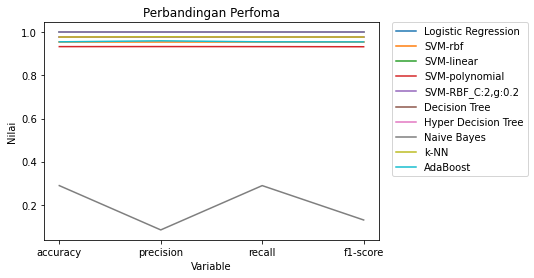

,l-regression,SVM-rbf,SVM-linear,SVM-polynomial,"SVM-RBF_C:2,g:0.2",SVM-polynomial,naive_bayes,naive_bayes,k-NN,Ada Boost
accuracy,0.977778,0.955556,1.0,0.933333,1.0,0.977778,0.977778,0.288889,0.977778,0.955556
precision,0.979012,0.955556,1.0,0.933532,1.0,0.979012,0.979012,0.083457,0.979012,0.960234
recall,0.977778,0.955556,1.0,0.933333,1.0,0.977778,0.977778,0.288889,0.977778,0.955556
f1-score,0.977712,0.955556,1.0,0.932735,1.0,0.977712,0.977712,0.129502,0.977712,0.955203


In [107]:

plt.plot(n_lr  , label="Logistic Regression")
plt.plot(n_svm  , label="SVM-rbf")
plt.plot(n_svmLinear  , label="SVM-linear")
plt.plot(n_svmPly  , label="SVM-polynomial")
plt.plot(n_svmRBF  , label="SVM-RBF_C:2,g:0.2")
plt.plot(n_DT  , label="Decision Tree")
plt.plot(n_HDT  , label="Hyper Decision Tree")
plt.plot(n_nb  , label="Naive Bayes")
plt.plot(n_knn  , label="k-NN")
plt.plot(n_ab  , label="AdaBoost")

plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)

plt.title("Perbandingan Perfoma")
plt.xlabel("Variable")
plt.ylabel("Nilai")

plt.show()

result = pd.concat([n_lr, n_svm, n_svmLinear, n_svmPly, n_svmRBF, n_DT, n_HDT,n_nb, n_knn, n_ab ], axis=1).reindex(n_nb.index)
pd.set_option('display.max_columns', None)
result.head()

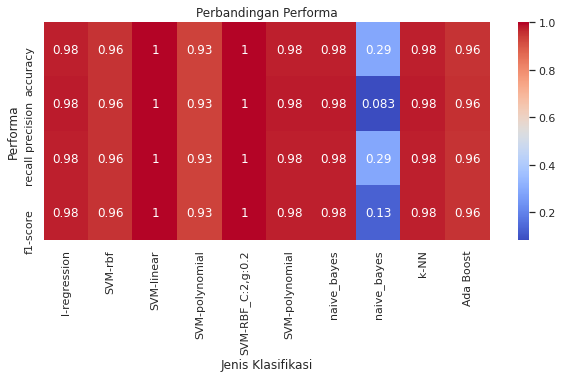

In [129]:
sns.set(rc = {'figure.figsize':(10,4)})
o = sns.heatmap(
    result, 
    cmap='coolwarm',
    annot=True
    )
plt.title("Perbandingan Performa")
plt.xlabel("Jenis Klasifikasi")
plt.ylabel("Performa")
plt.show(o)